# Assignment
## Computer Vision and Image Processing
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it - Riccardo Spezialetti, riccardo.spezialetti@unibo.it

## KITTI
[KITTI](http://www.cvlibs.net/datasets/kitti/index.php) is a collection of 42,382 stereo sequences taken in urban environments from two video cameras and a LiDAR device mounted on the roof of a car. This dataset is widely used for benchmarking geometric understanding tasks such as depth, flow and pose estimation. 

<img src="kitti/000000_10.png" width="720">

## Goal
Given a Kitti image alongside the camera instrisics parameters, transform the image as it would have been acquired by your phone camera, i.e. by having your mobile phone mounted in the very exact position and pose as the Kitti camera.

## Data
**Images**: Images in the folder: _"kitti/"_

**Intrinsics Parameters of the KITTI Camera (Matrix A)**: 
$$\begin{bmatrix} 707.0912 & 0.0 & 601.8873 \\ 0.0 & 707.0912 & 183.1104 \\ 0.0 & 0.0 & 1.0 \end{bmatrix}$$

processing es0/0.png


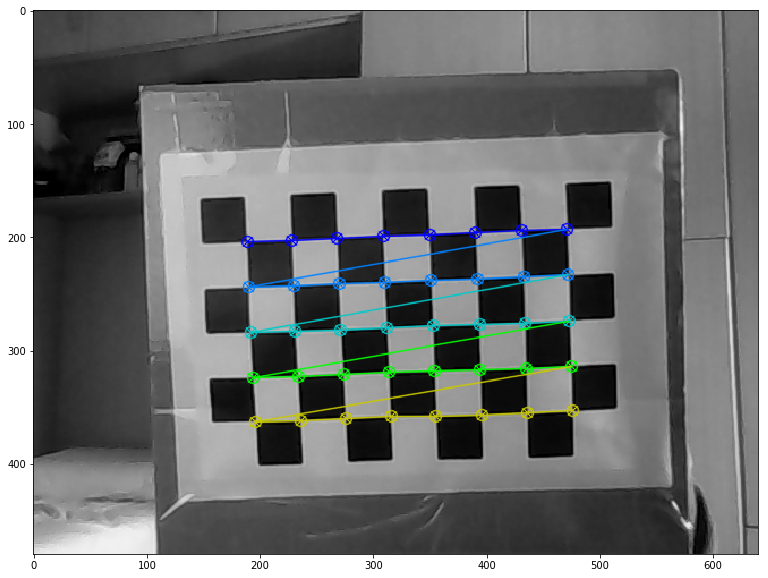

           es0/0.png... OK
processing es0/1.png


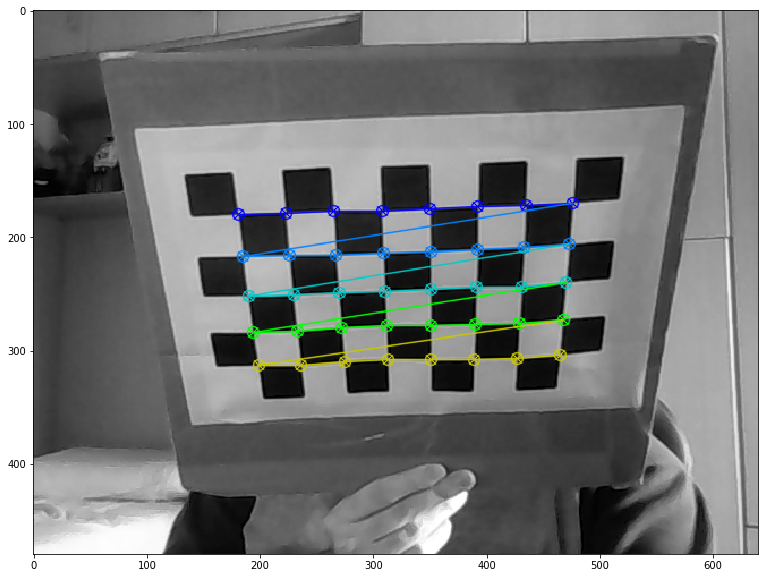

           es0/1.png... OK
processing es0/2.png


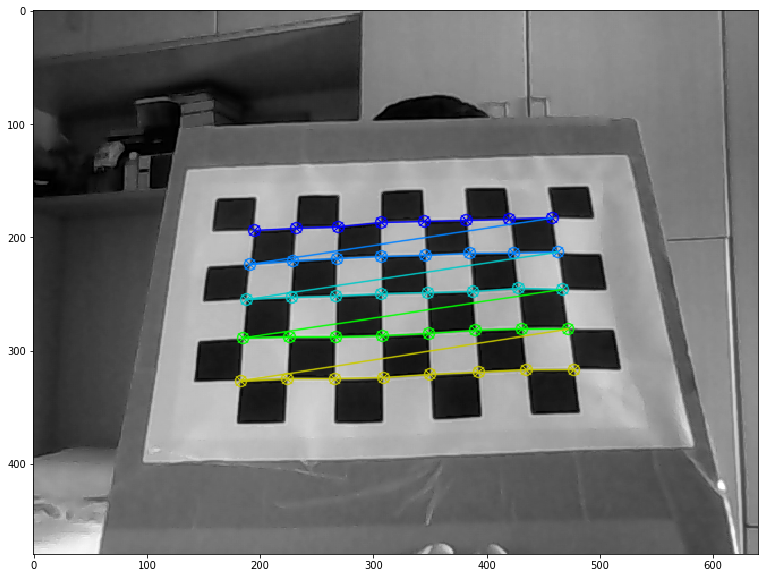

           es0/2.png... OK
processing es0/3.png


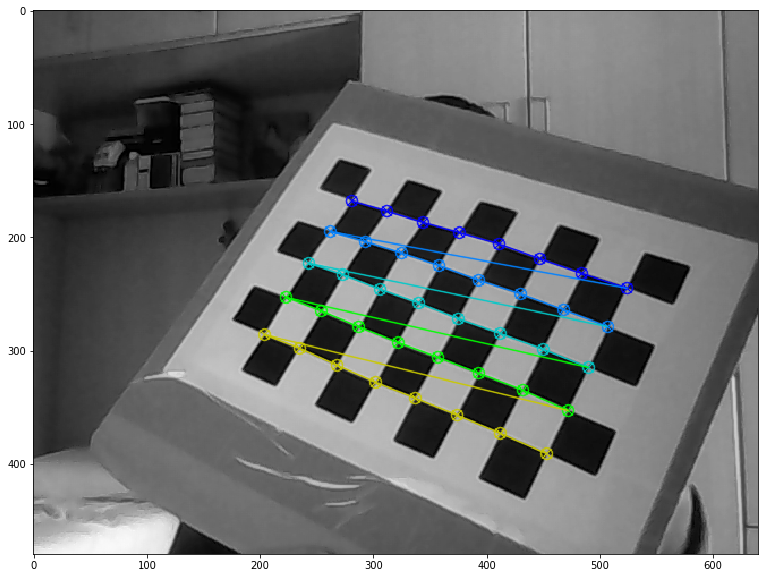

           es0/3.png... OK
processing es0/4.png


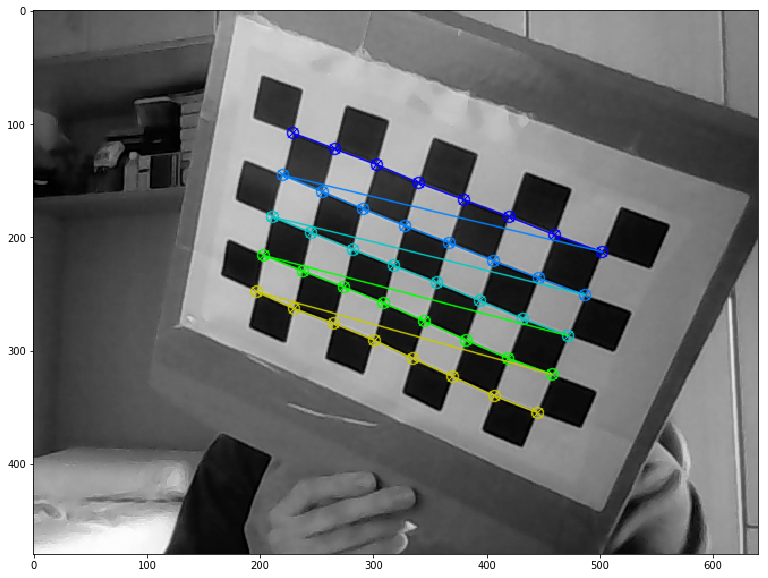

           es0/4.png... OK
processing es0/5.png


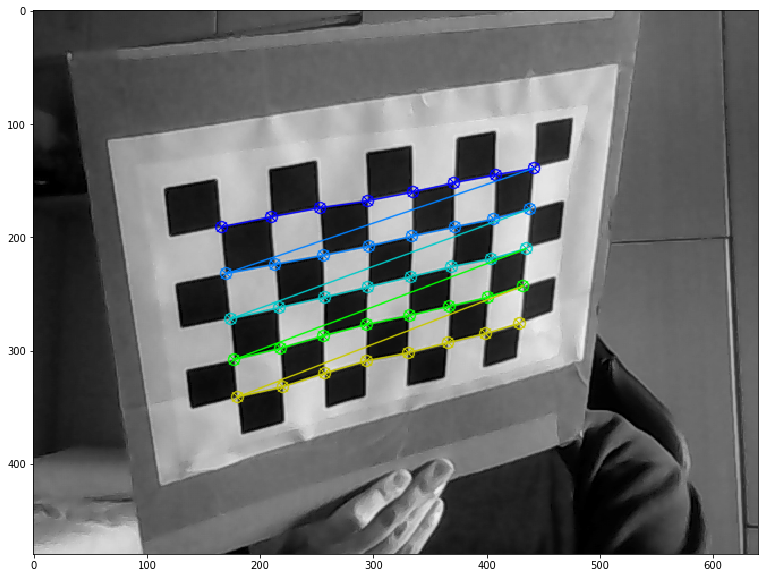

           es0/5.png... OK
processing es0/6.png


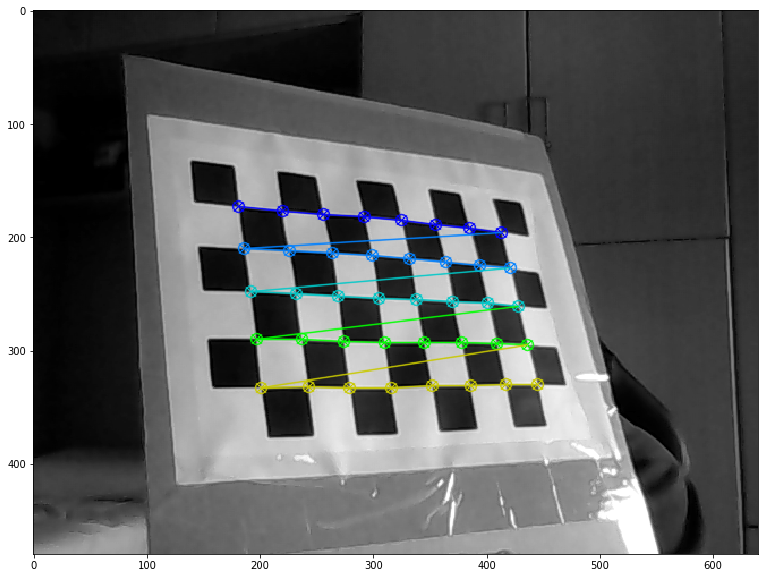

           es0/6.png... OK
processing es0/7.png


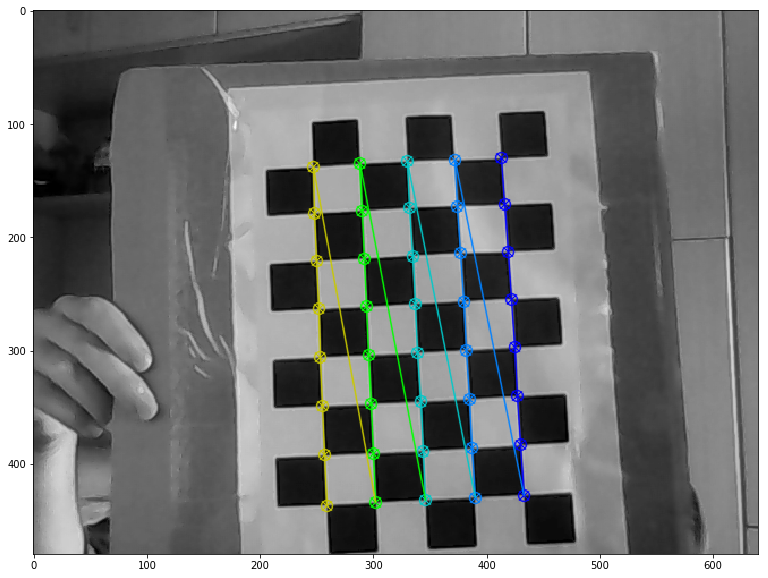

           es0/7.png... OK
processing es0/8.png


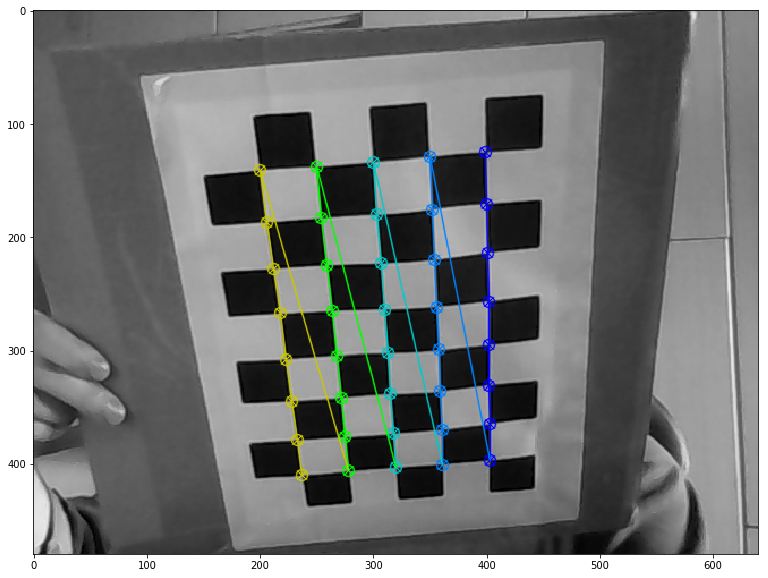

           es0/8.png... OK
processing es0/9.png


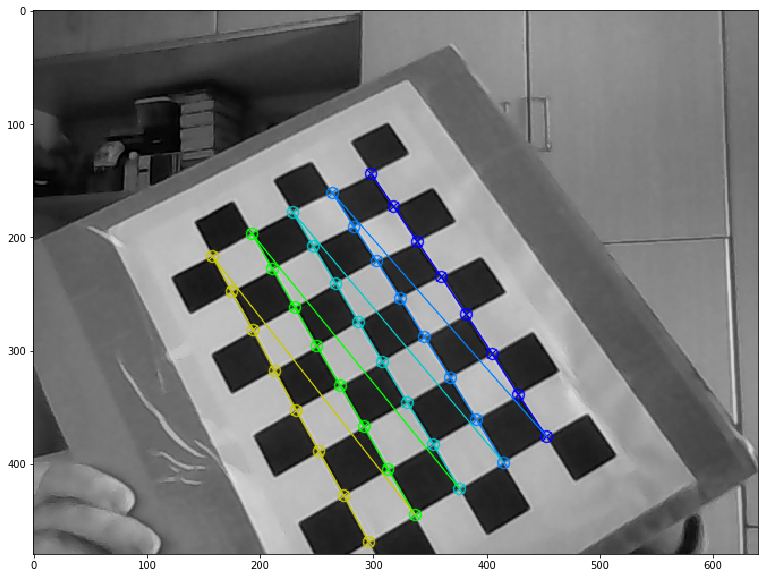

           es0/9.png... OK
processing es0/10.png


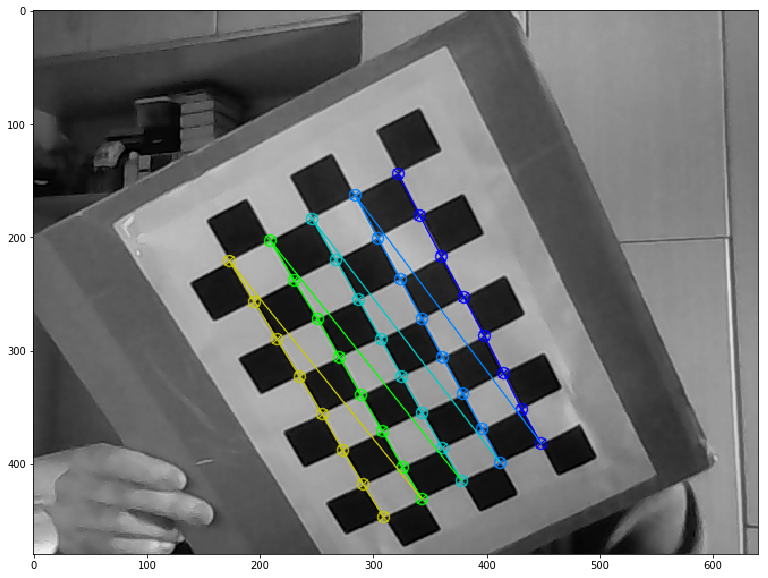

           es0/10.png... OK
processing es0/11.png


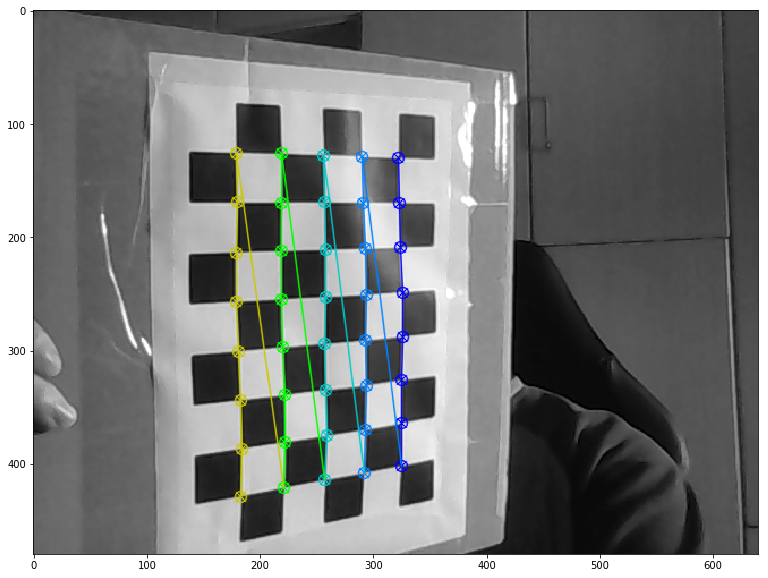

           es0/11.png... OK

RMS: 0.8771256305431986
camera matrix:
 [[771.55285618   0.         275.44451896]
 [  0.         768.09364332 222.3424773 ]
 [  0.           0.           1.        ]]
distortion coefficients:  [ 3.49483930e-02 -4.94743744e+00  3.67598020e-03 -9.67304593e-03
  3.20123405e+01]
Rotation vectors: [array([[ 0.05919653],
       [ 0.09034863],
       [-0.0433061 ]]), array([[ 0.56539247],
       [ 0.0386206 ],
       [-0.04972809]]), array([[-0.61037475],
       [ 0.09091208],
       [-0.01230711]]), array([[-0.49077134],
       [ 0.43603969],
       [ 0.43979345]]), array([[0.41864695],
       [0.34654804],
       [0.32031088]]), array([[ 0.49711887],
       [-0.3880201 ],
       [-0.11470281]]), array([[-0.431327  ],
       [-0.49939781],
       [-0.04563481]]), array([[-0.07588057],
       [ 0.11986604],
       [ 1.52052041]]), array([[ 0.3901547 ],
       [-0.35462294],
       [ 1.45390731]]), array([[-0.34622904],
       [ 0.30316863],
       [ 1.03064205]]),

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Find chessboard corners

def processImage(fn):
    print('processing {}'.format(fn))
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    # Check image loaded correctly
    if img is None:
        print("Failed to load", fn)
        return None
    # Finding corners
    found, corners = cv2.findChessboardCorners(img, pattern_size)
    if found:
        # Refining corner position
        term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 5, 1)
        cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)
        # Visualize detected corners
        vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        cv2.drawChessboardCorners(vis, pattern_size, corners, found)
        plt.figure(figsize=(20,10))
        plt.imshow(vis)
        plt.show()
    else:
        print('chessboard not found')
        return None
    print('           %s... OK' % fn)
    return (corners.reshape(-1, 2), pattern_points)

dirname = "es0/"
img_names = [dirname + str(i) + ".png" for i in range(12)]

pattern_size = (8,5) # number of inner corner, (columns, rows) for OpenCV
square_size = 26.5 #mm

indices = np.indices(pattern_size, dtype=np.float32)
indices *= square_size
coords_3D = np.transpose(indices, [2, 1, 0])
coords_3D = coords_3D.reshape(-1, 2)
pattern_points = np.concatenate([coords_3D, np.zeros([coords_3D.shape[0], 1], dtype=np.float32)], axis=-1)

chessboards = [processImage(fn) for fn in img_names]

# Creating the lists of 2D and 3D points
obj_points = [] #3D points
img_points = [] #2D points

for (corners, pattern_points) in chessboards:
    img_points.append(corners)
    obj_points.append(pattern_points)


# Getting the width and height of the images
h, w = cv2.imread(img_names[0], cv2.IMREAD_GRAYSCALE).shape[:2]

# Calibrating Camera
rms, camera_matrix, dist_coefs, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h), None, None)

print("\nRMS:", rms)
print("camera matrix:\n", camera_matrix)
print("distortion coefficients: ", dist_coefs.ravel())
print("Rotation vectors:", rvecs)
print("translation vectors", tvecs)

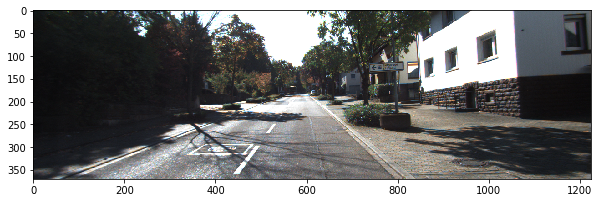

[[707.0912   0.     601.8873]
 [  0.     707.0912 183.1104]
 [  0.       0.       1.    ]]
[[799.85131836   0.         285.267493  ]
 [  0.         757.18774414 223.56572805]
 [  0.           0.           1.        ]]


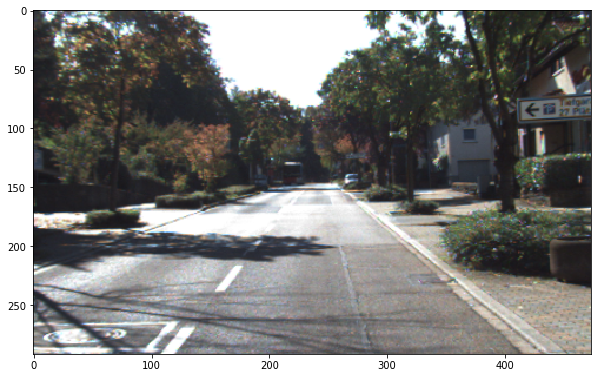

In [25]:
# Write here your solution


img = cv2.imread('kitti/000000_10.png')
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

kitti_camera_matrix = np.array([[707.0912, 0.0, 601.8873],
                         [0.0, 707.0912, 183.1104],
                         [0.0, 0.0, 1.0]])
#h, w = img.shape[:2]
print(kitti_camera_matrix)
#print(w, h)

# Finding the new optical camera matrix
# newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coefs, (w, h), 1, (w, h))
# newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, 0.0, (w, h), 1, (w, h))

newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coefs, (w, h), 1, (w, h))
print(newcameramtx)

im_undistorted = cv2.undistort(img, kitti_camera_matrix, dist_coefs, None, newcameramtx)
# im_undistorted = cv2.undistort(img, camera_matrix, 0.0, None, newcameramtx)

# mx, my = cv2.initUndistortRectifyMap(camera_matrix, np.asarray([0]*4), None, newcameramtx, (w, h), 5) #calculate conversion from A to CAo
# im_undistorted = cv2.remap(img, mx, my, cv2.INTER_LINEAR) # convert to CAo
    
x, y, w_2, h_2 = roi
im_undistorted = im_undistorted[y:y+h_2, x:x+w_2]

# Plotting UNDISTORTED image
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(im_undistorted, cv2.COLOR_BGR2RGB))
plt.show()